## Import the libraries

In [28]:
import pandas as pd
import numpy as np

## Load and Preprocess data

In [29]:
seed = 128
ran = np.random.RandomState(seed)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [30]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [31]:
train_data_dir = "train/"
test_data_dir = "test/"

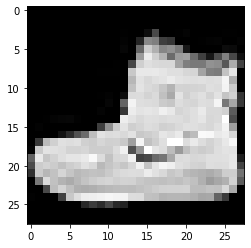

In [32]:
import imageio
import matplotlib.pyplot as plt
img = imageio.imread(train_data_dir+"1.png", as_gray = True)
plt.imshow(img, cmap = "gray")

In [33]:
img.shape

(28, 28)

In [34]:
# print(img)

## Create train, test and Validation Set

In [39]:
import keras

temp = []
for img_name in train.id:
    img = imageio.imread(train_data_dir + str(img_name) + ".png", as_gray = True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

# Normalisation
train_x /= 255.0

# Convert the array to the input format
train_x = train_x.reshape(-1, 784).astype('float32')

# Prepare test files
temp = []
for img_name in test.id:
    img = imageio.imread(test_data_dir + str(img_name) + ".png", as_gray = True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

# Normalisation
test_x /= 255.0

# Convert the array to the input format
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

Using TensorFlow backend.


### Create validation set from Training set

In [40]:
# split the datset into train and validation
split_size = int(train_x.shape[0] * 0.7)
print(split_size)
train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

42000


In [44]:
train_x.shape

(42000, 784)

## Create the model architecture

In [125]:
input_num_units = 784
hidden_num_units = 50
output_num_units = 10
batch_size = 128

In [144]:
epochs = 500

In [155]:
from keras.models import Sequential
from keras.layers import Dense

# Model creation
model = Sequential([
    Dense(input_dim = input_num_units, output_dim = hidden_num_units, activation = 'relu'),
    Dense(input_dim = hidden_num_units, output_dim = 150, activation = 'relu'),
    Dense(input_dim = 100, output_dim = 150, activation = 'relu'),
    Dense(input_dim = 150, output_dim = 180, activation = 'relu'),
    Dense(input_dim = 180, output_dim = 200, activation = 'relu'),
    Dense(input_dim = 200, output_dim = 150, activation = 'relu'),
    Dense(input_dim = 150, output_dim = 100, activation = 'relu'),
    Dense(input_dim = 100, output_dim = 30, activation = 'relu'),
    Dense(input_dim = 30, output_dim = output_num_units, activation = 'softmax')])

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  
/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=150)`
  import sys
/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=150)`
  
/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=150, activation="relu", units=180)`
  if __name__ == '__main__':
/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim

## Train and validate the model

In [156]:
# Training the model
trained_model = model.fit(train_x, train_y, nb_epoch = epochs, batch_size = batch_size, validation_data =(val_x, val_y))

/home/rebekkal/miniconda3/envs/rv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 4s 84us/step - loss: 0.7203 - accuracy: 0.7383 - val_loss: 0.4743 - val_accuracy: 0.8345
Epoch 2/500
42000/42000 [==============================] - 3s 74us/step - loss: 0.4399 - accuracy: 0.8411 - val_loss: 0.3958 - val_accuracy: 0.8583
Epoch 3/500
42000/42000 [==============================] - 3s 75us/step - loss: 0.3852 - accuracy: 0.8598 - val_loss: 0.4319 - val_accuracy: 0.8442
Epoch 4/500
42000/42000 [==============================] - 3s 75us/step - loss: 0.3581 - accuracy: 0.8695 - val_loss: 0.3677 - val_accuracy: 0.8682
Epoch 5/500
42000/42000 [==============================] - 3s 75us/step - loss: 0.3316 - accuracy: 0.8792 - val_loss: 0.3516 - val_accuracy: 0.8711
Epoch 6/500
42000/42000 [==============================] - 3s 76us/step - loss: 0.3180 - accuracy: 0.8818 - val_loss: 0.3611 - val_accuracy: 0.8648
Epoch 7/500
42000/42000 [==============================] - 3s 

Epoch 56/500
42000/42000 [==============================] - 3s 74us/step - loss: 0.1019 - accuracy: 0.9607 - val_loss: 0.5342 - val_accuracy: 0.8830
Epoch 57/500
42000/42000 [==============================] - 3s 82us/step - loss: 0.0971 - accuracy: 0.9625 - val_loss: 0.5385 - val_accuracy: 0.8854
Epoch 58/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.1079 - accuracy: 0.9585 - val_loss: 0.5189 - val_accuracy: 0.8887
Epoch 59/500
42000/42000 [==============================] - 3s 79us/step - loss: 0.1064 - accuracy: 0.9588 - val_loss: 0.5362 - val_accuracy: 0.8913
Epoch 60/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0949 - accuracy: 0.9636 - val_loss: 0.5503 - val_accuracy: 0.8887
Epoch 61/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0921 - accuracy: 0.9642 - val_loss: 0.5389 - val_accuracy: 0.8836
Epoch 62/500
42000/42000 [==============================] - 3s 79us/step - loss: 0.0931 - accuracy: 0.9647

Epoch 111/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0466 - accuracy: 0.9829 - val_loss: 0.6661 - val_accuracy: 0.8903
Epoch 112/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0473 - accuracy: 0.9827 - val_loss: 0.6675 - val_accuracy: 0.8895
Epoch 113/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0442 - accuracy: 0.9841 - val_loss: 0.7156 - val_accuracy: 0.8827
Epoch 114/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0464 - accuracy: 0.9831 - val_loss: 0.6755 - val_accuracy: 0.8874
Epoch 115/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0468 - accuracy: 0.9827 - val_loss: 0.6773 - val_accuracy: 0.8782
Epoch 116/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0450 - accuracy: 0.9834 - val_loss: 0.6956 - val_accuracy: 0.8864
Epoch 117/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0439 - accuracy:

42000/42000 [==============================] - 3s 67us/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.8617 - val_accuracy: 0.8877
Epoch 166/500
42000/42000 [==============================] - 3s 68us/step - loss: 0.0459 - accuracy: 0.9852 - val_loss: 0.6423 - val_accuracy: 0.8865
Epoch 167/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.8001 - val_accuracy: 0.8864
Epoch 168/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.8175 - val_accuracy: 0.8872
Epoch 169/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.6931 - val_accuracy: 0.8828
Epoch 170/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0300 - accuracy: 0.9896 - val_loss: 0.8755 - val_accuracy: 0.8812
Epoch 171/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0233 - accuracy: 0.9920 - val_

Epoch 220/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.9825 - val_accuracy: 0.8870
Epoch 221/500
42000/42000 [==============================] - 3s 74us/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.9946 - val_accuracy: 0.8910
Epoch 222/500
42000/42000 [==============================] - 3s 74us/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.7798 - val_accuracy: 0.8866
Epoch 223/500
42000/42000 [==============================] - 4s 84us/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 1.1246 - val_accuracy: 0.8906
Epoch 224/500
42000/42000 [==============================] - 3s 79us/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.9002 - val_accuracy: 0.8856
Epoch 225/500
42000/42000 [==============================] - 3s 76us/step - loss: 0.0309 - accuracy: 0.9915 - val_loss: 0.9177 - val_accuracy: 0.8867
Epoch 226/500
42000/42000 [==============================] - 3s 76us/step - loss: 0.0158 - accuracy:

42000/42000 [==============================] - 3s 73us/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.9356 - val_accuracy: 0.8879
Epoch 275/500
42000/42000 [==============================] - 3s 72us/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 1.0728 - val_accuracy: 0.8898
Epoch 276/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.7428 - val_accuracy: 0.8862
Epoch 277/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 1.0056 - val_accuracy: 0.8903
Epoch 278/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.9777 - val_accuracy: 0.8877
Epoch 279/500
42000/42000 [==============================] - 3s 72us/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.9408 - val_accuracy: 0.8893
Epoch 280/500
42000/42000 [==============================] - 3s 73us/step - loss: 0.0122 - accuracy: 0.9961 - val_

Epoch 329/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 1.1456 - val_accuracy: 0.8849
Epoch 330/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 1.0388 - val_accuracy: 0.8872
Epoch 331/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 1.1672 - val_accuracy: 0.8913
Epoch 332/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.9506 - val_accuracy: 0.8803
Epoch 333/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 1.2569 - val_accuracy: 0.8908
Epoch 334/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.7887 - val_accuracy: 0.8871
Epoch 335/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0168 - accuracy:

42000/42000 [==============================] - 3s 67us/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.9987 - val_accuracy: 0.8822
Epoch 384/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 1.1219 - val_accuracy: 0.8871
Epoch 385/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0283 - accuracy: 0.9924 - val_loss: 0.9733 - val_accuracy: 0.8846
Epoch 386/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 1.1418 - val_accuracy: 0.8871
Epoch 387/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 1.1376 - val_accuracy: 0.8859
Epoch 388/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 1.0929 - val_accuracy: 0.8868
Epoch 389/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0129 - accuracy: 0.9964 - val_

Epoch 438/500
42000/42000 [==============================] - 3s 66us/step - loss: 8.7761e-04 - accuracy: 0.9999 - val_loss: 1.3607 - val_accuracy: 0.8897
Epoch 439/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 1.0865 - val_accuracy: 0.8851
Epoch 440/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 1.3604 - val_accuracy: 0.8895
Epoch 441/500
42000/42000 [==============================] - 3s 68us/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 1.0667 - val_accuracy: 0.8862
Epoch 442/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0228 - accuracy: 0.9944 - val_loss: 1.0185 - val_accuracy: 0.8859
Epoch 443/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 1.2961 - val_accuracy: 0.8891
Epoch 444/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0087 - accur

42000/42000 [==============================] - 3s 68us/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 1.1805 - val_accuracy: 0.8894
Epoch 493/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 1.3255 - val_accuracy: 0.8889
Epoch 494/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 1.1487 - val_accuracy: 0.8882
Epoch 495/500
42000/42000 [==============================] - 3s 68us/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 1.2010 - val_accuracy: 0.8901
Epoch 496/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 1.0804 - val_accuracy: 0.8864
Epoch 497/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 1.2891 - val_accuracy: 0.8876
Epoch 498/500
42000/42000 [==============================] - 3s 67us/step - loss: 0.0122 - accuracy: 0.9974 - val_

## Test the model

1300
Prediction is  4


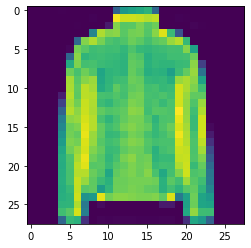

In [158]:
pred = model.predict_classes(test_x)

img_name = ran.choice(test.id)
img = imageio.imread(test_data_dir + str(img_name) + ".png", as_gray = True)
plt.imshow(img)
test_index = img_name - train.shape[0]
print(test_index)
print("Prediction is ",pred[test_index-1])

In [159]:
print(pred)

[9 2 1 ... 8 1 5]


## Create the submission file

In [160]:
sample_submission = pd.read_csv("sample_submision.csv")
sample_submission.label = pred
sample_submission.to_csv("sample_submission.csv",index=False)
sample_submission.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
